# Bank Dataset Dimensionality Reduction and Classification
This notebook demonstrates data preprocessing, dimensionality reduction (PCA, t-SNE, ICA, UMAP, LDA), and classification using Logistic Regression on the Bank Marketing dataset.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA, FastICA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import os 
save_path = "../images"
os.makedirs(save_path, exist_ok=True)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Step 1: Load and preprocess the data
We load the dataset, replace unknown or nonexistent values with NaN, drop missing values, and encode the target variable.

In [3]:
data = pd.read_csv("../data/bank-additional-full.csv", sep=";")

# Replace unknown or nonexistent values with NaN
data.replace(['unknown', 'nonexistent'], np.nan, inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Convert target variable 'y' to numeric
data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Separate features and target
X = data.drop("y", axis=1)
y = data["y"]

# Identify numeric and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing: One-hot encode categorical columns, leave numeric columns as is
preprocessor = ColumnTransformer(transformers=[
    ('num', 'passthrough', num_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
])

X_encoded = preprocessor.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

## Step 2: PCA (Principal Component Analysis)
We reduce the dataset to 2 principal components and visualize it using a scatter plot.

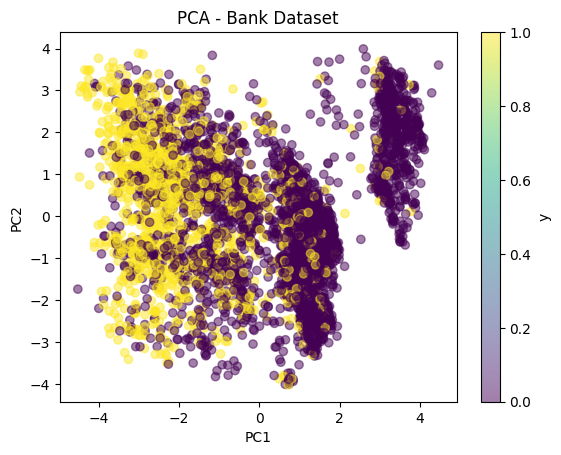

=== Logistic Regression after PCA (2 components) ===
Accuracy: 0.8045112781954887
Confusion Matrix:
 [[593  80]
 [102 156]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       673
           1       0.66      0.60      0.63       258

    accuracy                           0.80       931
   macro avg       0.76      0.74      0.75       931
weighted avg       0.80      0.80      0.80       931



In [4]:
modelPCA = PCA(n_components=2, random_state=42)
X_pca = modelPCA.fit_transform(X_scaled)

# Plot PCA result
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - Bank Dataset")
plt.colorbar(label='y')
plt.savefig(f"{save_path}/PCA.png", dpi=300)

plt.show()

# Logistic Regression on PCA features
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)
model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = model_pca.predict(X_test_pca)

print("=== Logistic Regression after PCA (2 components) ===")
print("Accuracy:", accuracy_score(y_test_pca, y_pred_pca))
print("Confusion Matrix:\n", confusion_matrix(y_test_pca, y_pred_pca))
print("Classification Report:\n", classification_report(y_test_pca, y_pred_pca))

## Step 3: Logistic Regression on full features
We train a logistic regression model using all features without dimensionality reduction.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("=== Logistic Regression (full features) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

=== Logistic Regression (full features) ===
Accuracy: 0.8367346938775511
Confusion Matrix:
 [[610  63]
 [ 89 169]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       673
           1       0.73      0.66      0.69       258

    accuracy                           0.84       931
   macro avg       0.80      0.78      0.79       931
weighted avg       0.83      0.84      0.83       931



## Step 4: t-SNE
We apply t-SNE to reduce dimensions to 2 components and visualize the data.

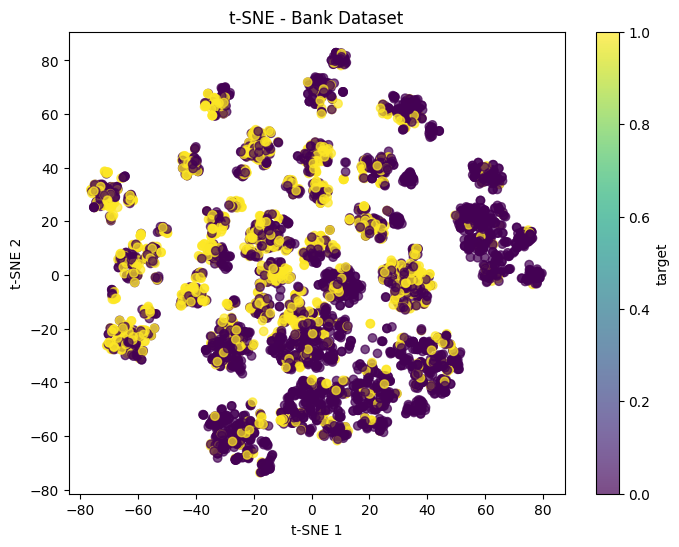


=== Logistic Regression after t-SNE (2 components) ===
Accuracy : 0.7271750805585392
Confusion Matrix :
 [[623  50]
 [204  54]]
Classification Report :
               precision    recall  f1-score   support

           0       0.75      0.93      0.83       673
           1       0.52      0.21      0.30       258

    accuracy                           0.73       931
   macro avg       0.64      0.57      0.56       931
weighted avg       0.69      0.73      0.68       931



In [6]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE - Bank Dataset")
plt.colorbar(label='target')
plt.savefig(f"{save_path}/t-SNE.png", dpi=300)

plt.show()

X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne= train_test_split(X_tsne, y, test_size=0.2, random_state=42, stratify=y)
model_tsne= LogisticRegression(max_iter=1000)
model_tsne.fit(X_train_tsne, y_train_tsne)
y_pred_tsne= model_tsne.predict(X_test_tsne)

print("\n=== Logistic Regression after t-SNE (2 components) ===")
print("Accuracy :", accuracy_score(y_test_tsne, y_pred_tsne))
print("Confusion Matrix :\n", confusion_matrix(y_test_tsne, y_pred_tsne))
print("Classification Report :\n", classification_report(y_test_tsne, y_pred_tsne))

## Step 5: ICA (Independent Component Analysis)
We reduce the data to 2 independent components and train logistic regression.

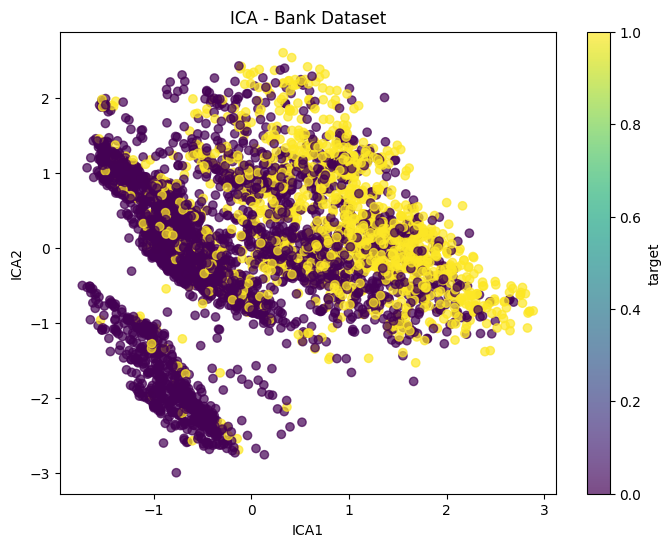


=== Logistic Regression after ICA (2 components) ===
Accuracy : 0.8045112781954887
Confusion Matrix :
 [[593  80]
 [102 156]]
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       673
           1       0.66      0.60      0.63       258

    accuracy                           0.80       931
   macro avg       0.76      0.74      0.75       931
weighted avg       0.80      0.80      0.80       931



In [7]:
ica = FastICA(n_components=2, random_state=42)
X_ICA = ica.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_ICA[:,0], X_ICA[:,1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel("ICA1")
plt.ylabel("ICA2")
plt.title("ICA - Bank Dataset")
plt.colorbar(label='target')
plt.savefig(f"{save_path}/ICA.png", dpi=300)

plt.show()

X_train_ica, X_test_ica, y_train_ica, y_test_ica= train_test_split(X_ICA, y, test_size=0.2, random_state=42, stratify=y)
model_ica= LogisticRegression(max_iter=1000)
model_ica.fit(X_train_ica, y_train_ica)
y_pred_ica= model_ica.predict(X_test_ica)

print("\n=== Logistic Regression after ICA (2 components) ===")
print("Accuracy :", accuracy_score(y_test_ica, y_pred_ica))
print("Confusion Matrix :\n", confusion_matrix(y_test_ica, y_pred_ica))
print("Classification Report :\n", classification_report(y_test_ica, y_pred_ica))

## Step 6: UMAP
We apply UMAP to reduce data to 2 components and visualize it.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


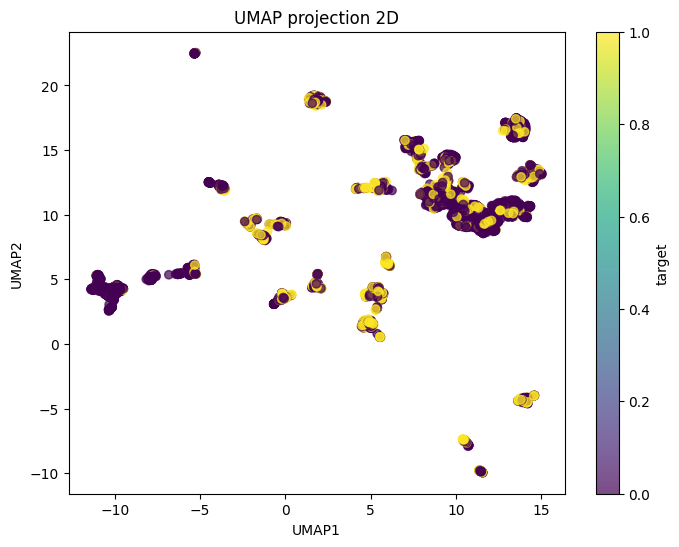

=== Logistic Regression after UMAP ===
Accuracy: 0.7228786251342643
Confusion Matrix:
 [[673   0]
 [258   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84       673
           1       0.00      0.00      0.00       258

    accuracy                           0.72       931
   macro avg       0.36      0.50      0.42       931
weighted avg       0.52      0.72      0.61       931



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

In [8]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.title("UMAP projection 2D")
plt.colorbar(label='target')
plt.savefig(f"{save_path}/UMAP.png", dpi=300)

plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_umap, y, test_size=0.2, random_state=42, stratify=y)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("=== Logistic Regression after UMAP ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

## Step 7: LDA (Linear Discriminant Analysis)
We apply LDA for dimensionality reduction and classification.

In [9]:
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

print("=== LDA - Classification ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

=== LDA - Classification ===
Accuracy: 0.7228786251342643
Confusion Matrix:
 [[673   0]
 [258   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84       673
           1       0.00      0.00      0.00       258

    accuracy                           0.72       931
   macro avg       0.36      0.50      0.42       931
weighted avg       0.52      0.72      0.61       931



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha